In [1]:
import open3d as o3d
import pandas as pd
import numpy as np
import random
import io
import matplotlib.pyplot as plt
import sys

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def read_and_preprocess(filepath, labelspath, factor=0.3):
    pc = pd.read_csv(filepath, sep=' ',header=None,  dtype=np.float32).to_numpy()
    print(pc.shape)
    pc_labels_unfil = pd.read_csv(labelspath).to_numpy()
    non_zero_indices = np.where(pc_labels_unfil != 0)
    pc_xyz_u = pc
    pc_xyz_u = pc_xyz_u[non_zero_indices[0], :]
    pc_labels = pc_labels_unfil[non_zero_indices]
    pc_xyz = pc_xyz_u[:, 0:3]
    pc_rgb = pc_xyz_u[:, 4:]
    randints = np.random.randint(0, high = pc_xyz.shape[0], size = int(factor*pc_xyz.shape[0]))
    pc_xyz = pc_xyz[randints, :]
    pc_rgb = pc_rgb[randints, :]
    #randints = 0
    pc_labels = pc_labels[randints]
    #print(pc_labels)
    return pc_xyz, pc_labels, pc_rgb, randints, non_zero_indices

def read_probs(filepath, randints, nonzero_indices):
    probs, labels = np.load(filepath)
    probs = probs[nonzero_indices[0]]
    labels = labels[nonzero_indices[0]]
    probs_downsampled = probs[randints]
    labels_downsampled = labels[randints]
    return probs_downsampled, labels_downsampled
    return probs, labels

In [3]:
def labels_to_colors(pc_labels):
    cmap = {0: [0, 0, 0],
            1: [0, 0, 1],
            2: [0, 1, 0],
            3: [1, 0, 0],
            4: [0, 1, 1],
            5: [1, 0, 1],
            6: [1, 1, 0],
            7: [0, 0.5, 0.5],
            8: [0.5, 0, 0.5]}
    print(pc_labels.shape)
    pc_clrs = np.asarray([cmap[x] for x in pc_labels])
    return pc_clrs

def convert_prob_colors(pc_probs):
    cmap = plt.get_cmap('viridis')
    pc_clrs = cmap(pc_probs)
    return pc_clrs

In [14]:
rgb_val = False
prob_val = True
path = './bildstein_station1_xyz_intensity_rgb.txt'
label_path = './bildstein_station1_xyz_intensity_rgb.labels'
#max_prob_path = './entropy_val/entropies/sem3d/10/bildstein_station1_xyz_intensity_rgb_probs.npy'
max_prob_path = './entropies_flipout/sem3d/10/bildstein_station1_xyz_intensity_rgb_probs.npy'
#max_prob_path = './sem3d/10/bildstein_station1_xyz_intensity_rgb_probs.npy'
#max_prob_path = './max_probs_flipout/sem3d/10/bildstein_station1_xyz_intensity_rgb_probs.npy'
pc_xyz, pc_labels, pc_rgb, downsampled_indices, nonzero_indices = read_and_preprocess(path, label_path, factor=0.3)
pc_probs, pc_labels_detect = read_probs(max_prob_path, downsampled_indices, nonzero_indices)
pc_labels_detect += 1
print(pc_labels_detect.shape)
if rgb_val:
    print('RGB values')
    pc_clrs = pc_rgb
elif prob_val:
    print('Probability values')
    pc_clrs_probs = convert_prob_colors(pc_probs)[:, :3]
    pc_clrs_detect = labels_to_colors(pc_labels_detect)
else:
    print('Labels values')
    print(pc_labels.shape)
    print(pc_xyz.shape)
    pc_clrs = labels_to_colors(pc_labels)

(29697591, 7)
(2842888,)
Probability values
(2842888,)


In [15]:
#distances = np.linalg.norm(pc_xyz, axis=1)
#print(len(distances))
#print(np.min(distances), np.max(distances))
#indices_less_45 = np.where(distances<86)[0]
#pc_xyz = pc_xyz[indices_less_45, :]
#pc_clrs = pc_clrs[indices_less_45]
#print(len(pc_xyz), len(pc_clrs), pc_probs.shape, distances.shape)
#dist = distances[indices_less_45]
#probs_dist = pc_probs[indices_less_45]
#plt.figure()
##plt.scatter(dist, probs_dist)
#plt.show()

In [17]:
# Draw the point cloud
#pc_clrs = pc_clrs_detect
pc_clrs = pc_clrs_probs
min_val, max_val = np.min(pc_clrs), np.max(pc_clrs)
pc_clrs = (pc_clrs-min_val)/(max_val-min_val)
print(np.min(pc_clrs), np.max(pc_clrs))
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pc_xyz)
pcd.colors = o3d.utility.Vector3dVector(pc_clrs)
o3d.visualization.draw_geometries([pcd])

0.0 1.0


In [57]:
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

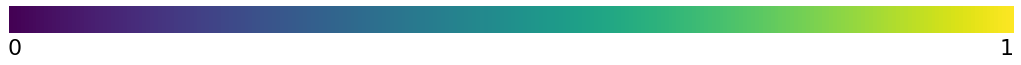

In [59]:
plt.figure(figsize=(18, 0.5))
plt.imshow(gradient, aspect='auto', cmap=plt.get_cmap('viridis'))
plt.text(-1, 3,'0', fontsize=22)
plt.text(252, 3,'1', fontsize=22)
plt.axis('off')
plt.savefig('prob_legend.pdf', dpi=600, bbox_inches='tight')
plt.show()